<h1 align="center">Paquete de onda en mecánica cuántica ondulatoria</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2. Planteamiento del problema

Sea una partícula cuántica en una dimensión (1D), descrita por la función de onda $\psi(x, t)$, para un cierto tiempo $t=0$.

$$\psi(x, 0) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} g(k) e^{ikx} dk \qquad\qquad (1)$$

$$\omega = \frac{\hbar k^2}{2m} \qquad\qquad (2)$$

Compare la descripción de una onda periódica, descrita por una serie de Fourier, con la representación de una onda en términos de su contenido espectral $g(k)$.

## 3. Métodos y definiciones

In [2]:
dpi = 300
fig_num = 0

In [3]:
def plot_wave_packet(σ, k_o, g_func, fig_num=0):
    x = np.linspace(-5*σ, 5*σ, 1000)
    k = np.linspace(-5*k_o, 5*k_o, 1000)

    g = g_func(σ, k_o, x, k)
    psi = np.sum([ g[n]*np.cos(k[n]*x) for n in range(len(g))], axis=0)
    psi /= np.trapz(np.abs(psi)**2, x=x)

    fig_num += 1

    plt.figure(dpi=dpi)
    plt.plot(x, psi)
    plt.hlines(max(psi), -σ/2, σ/2, linestyles='dotted', color='black', label=r'$\Delta x \approx \sigma = %0.2f$'%(σ))
    plt.vlines(-σ/2, 0, max(psi), linestyles='dotted', color='black')
    plt.vlines( σ/2, 0, max(psi), linestyles='dotted', color='black')
    plt.xlabel('x')
    plt.ylabel(r'$\psi(x, 0)$')
    plt.title('Figura %d' % fig_num)
    _ = plt.legend()

    fig_num += 1
    plt.figure(dpi=dpi)
    plt.plot(k, g)
    plt.hlines(max(g), -k_o, k_o, linestyles='dotted', color='black', label=r'$\Delta k \approx 2k_0 = %0.2f$'%(2*k_o))
    plt.vlines(-k_o, 0, max(g), linestyles='dotted', color='black')
    plt.vlines( k_o, 0, max(g), linestyles='dotted', color='black')
    plt.xlabel('k')
    plt.ylabel(r'$g(k)$')
    plt.title(r'Figura %d. $\Delta x \Delta k \approx %0.2f$' % (fig_num, σ * 2*k_o))
    _ = plt.legend()

    return fig_num

## 4. Paquetes de onda y relaciones entre $\Delta x$ y $\Delta k$

### 4.1. Serie de Fourier

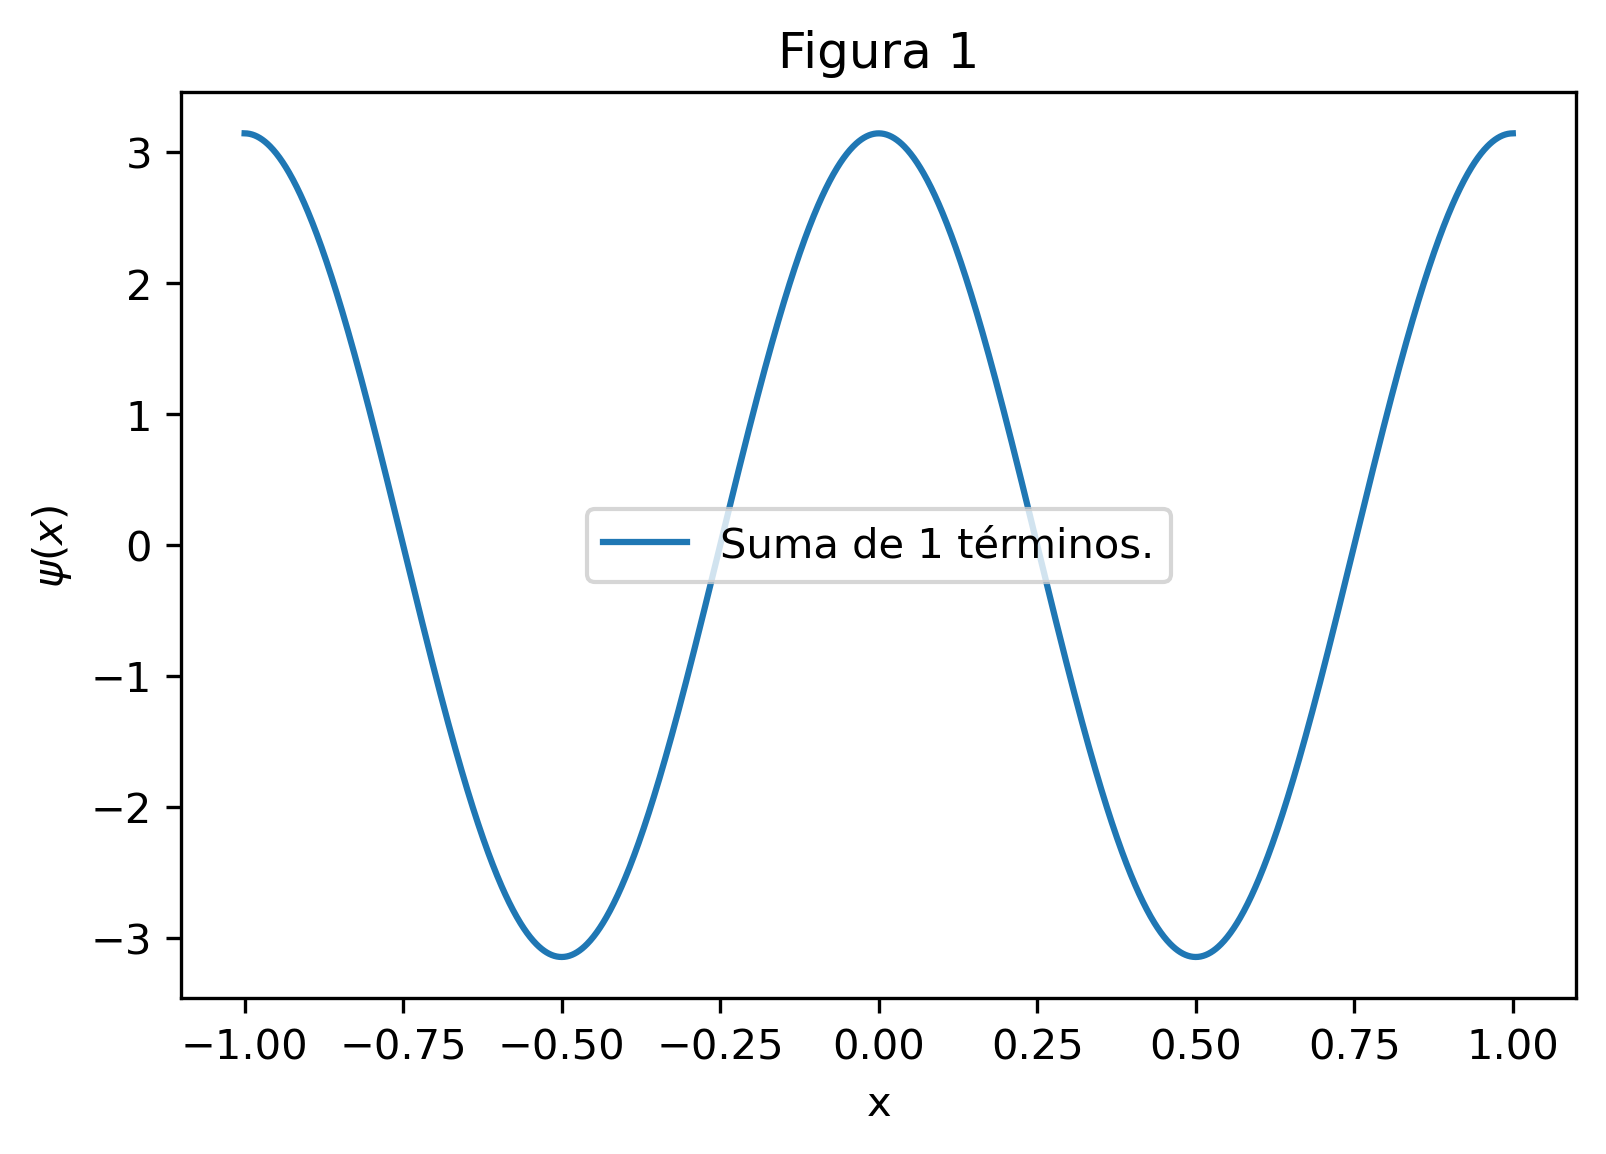

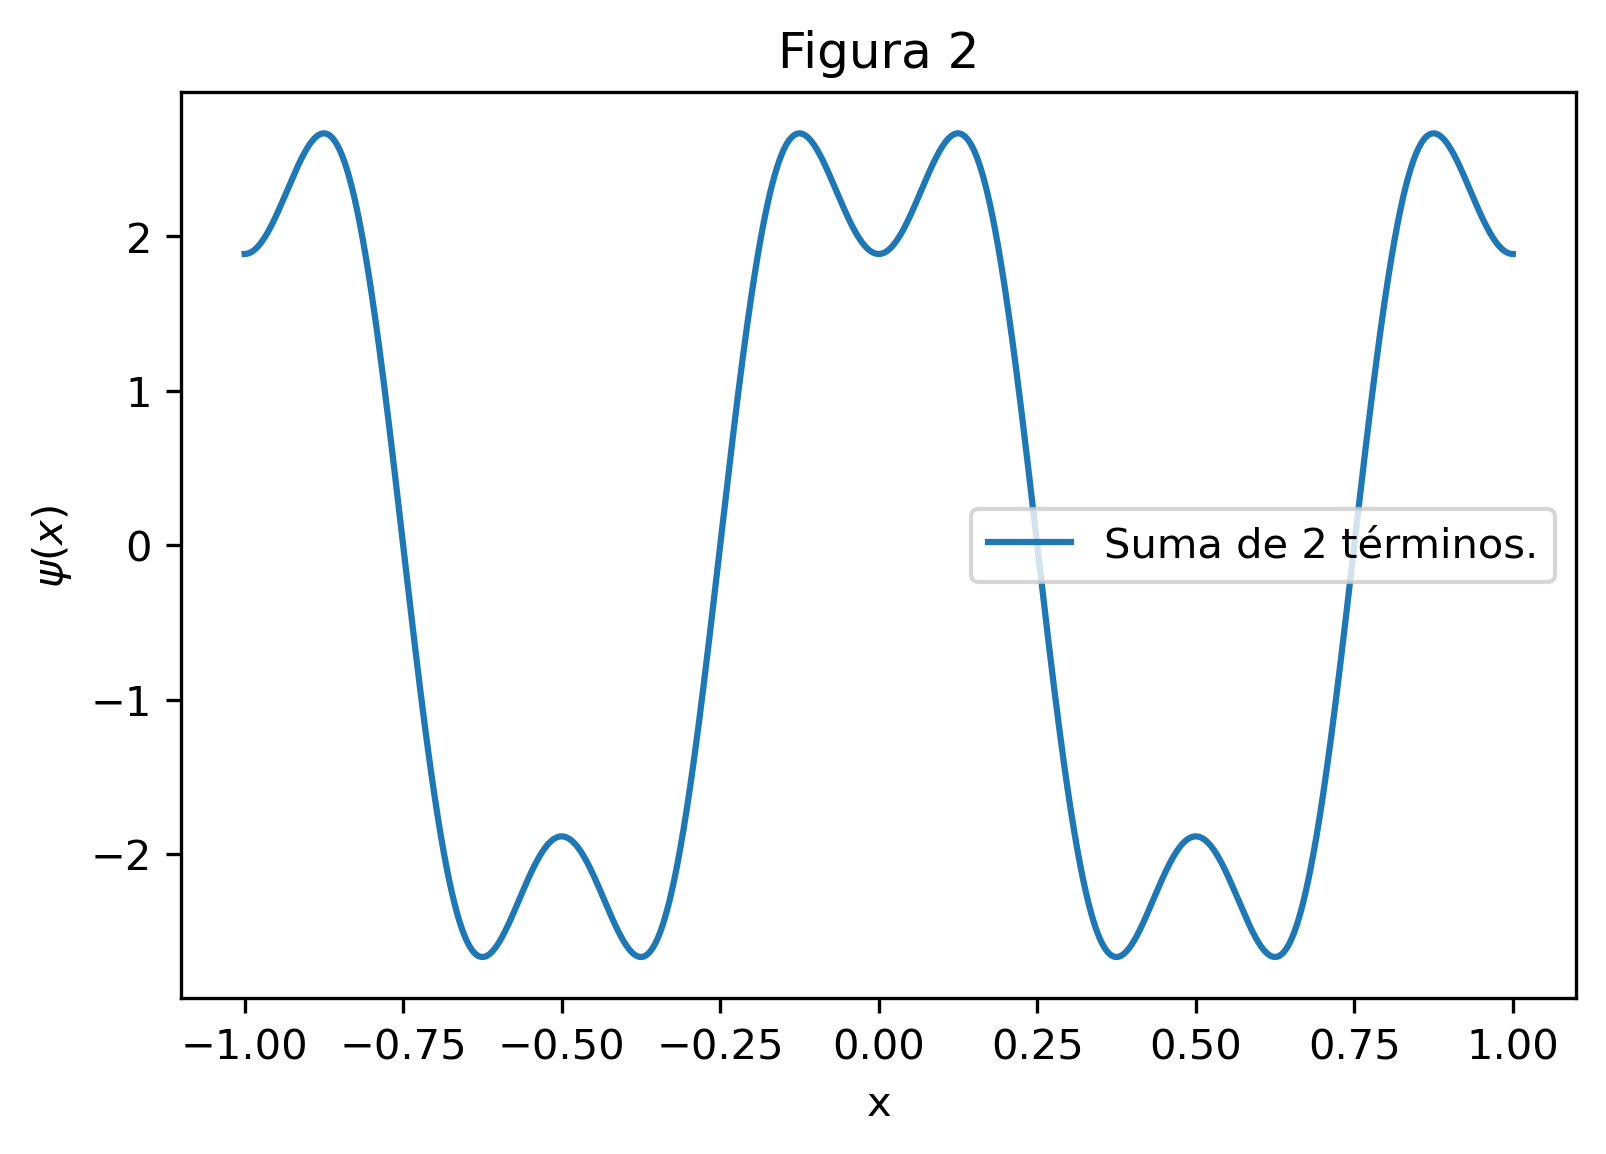

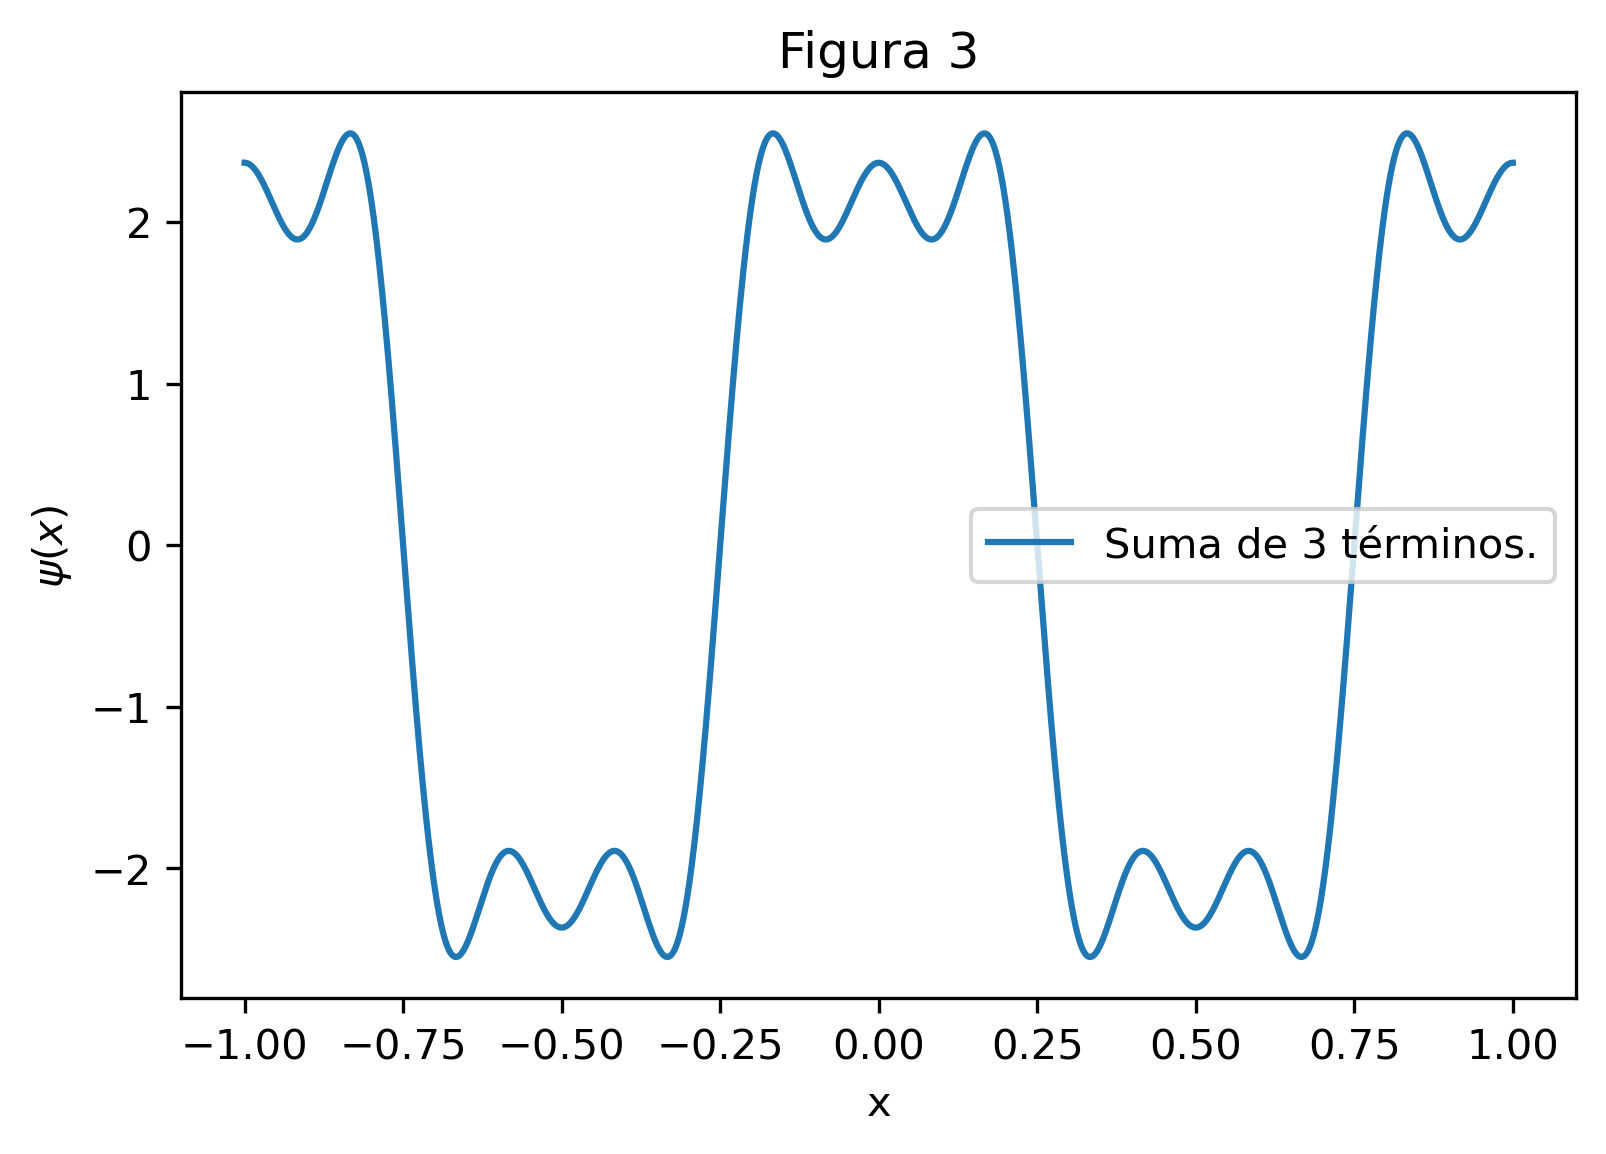

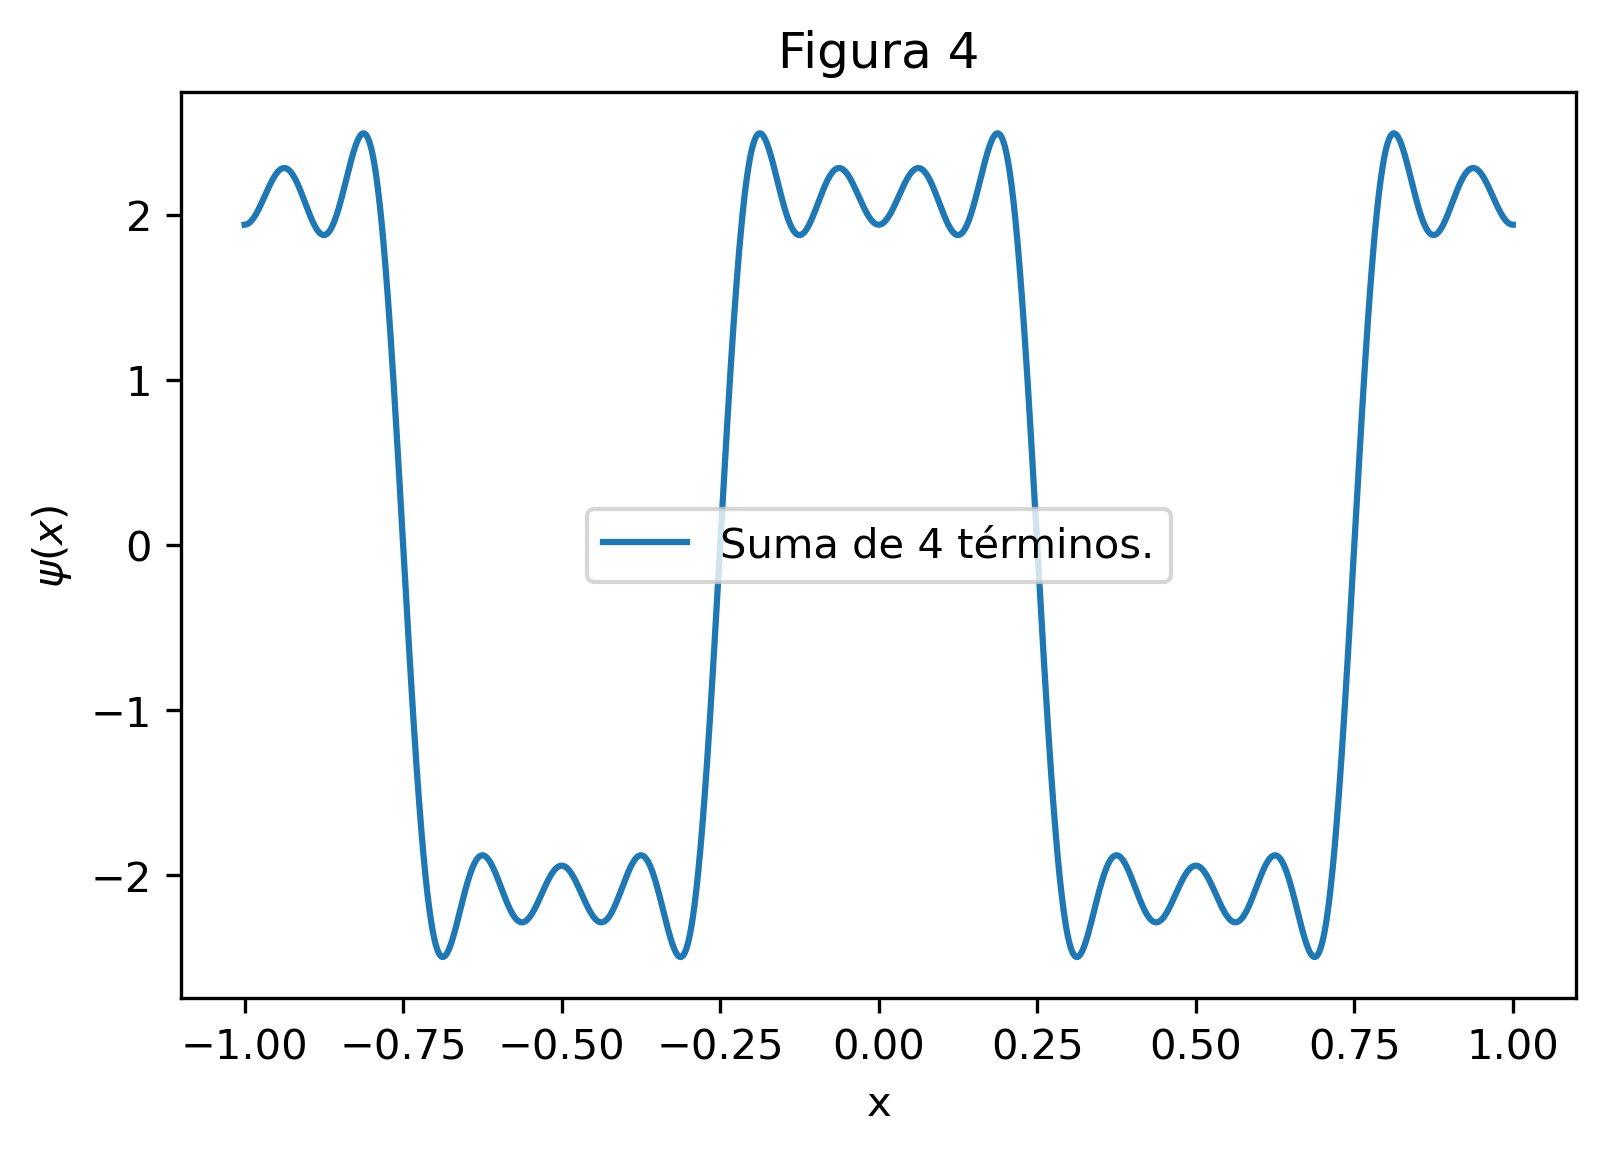

In [4]:
a_n = [0, 2/np.pi, 0, -2/(3*np.pi), 0 , 2/(5*np.pi), 0, -2/(7*np.pi)]
λ = 1
x = np.linspace(-λ, λ, 2000)
ψ = 0
zero_an = 0
for n, a in enumerate(a_n):
    if a == 0:
        zero_an += 1
        continue
    ψ += a * np.cos(2 * np.pi * n * x / λ)
    ψo = np.trapz(np.abs(ψ[np.abs(x)<λ/2])**2, x=x[np.abs(x)<λ/2])
    ψ_normalized = ψ / ψo
    fig_num += 1
    plt.figure(dpi=dpi)
    plt.plot(x, ψ_normalized, label='Suma de %d términos.' % (n-zero_an+1))
    plt.xlabel('x')
    plt.ylabel(r'$\psi(x)$')
    plt.legend()
    plt.title('Figura %d' % fig_num)

### 4.2. Ventana: $g(k) = 1$ para $|k| \leq k_0$ y $g(k)=0$ para otro k.

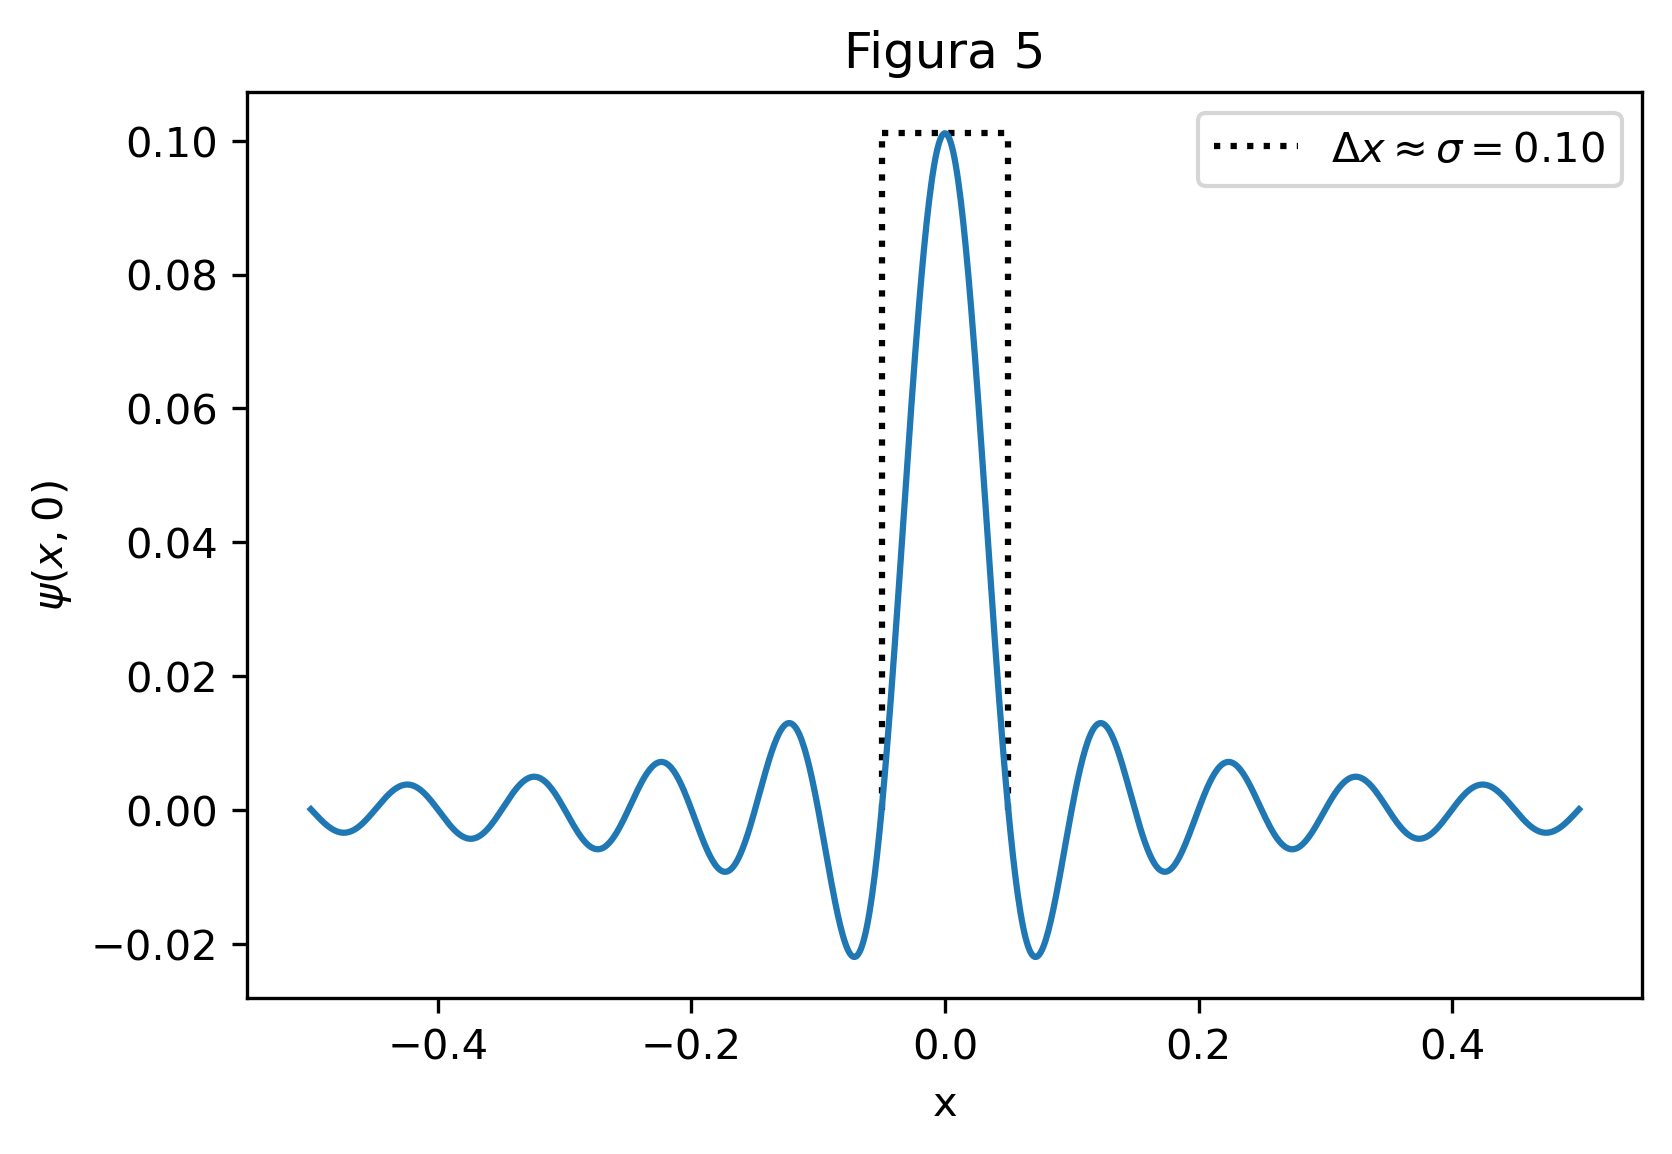

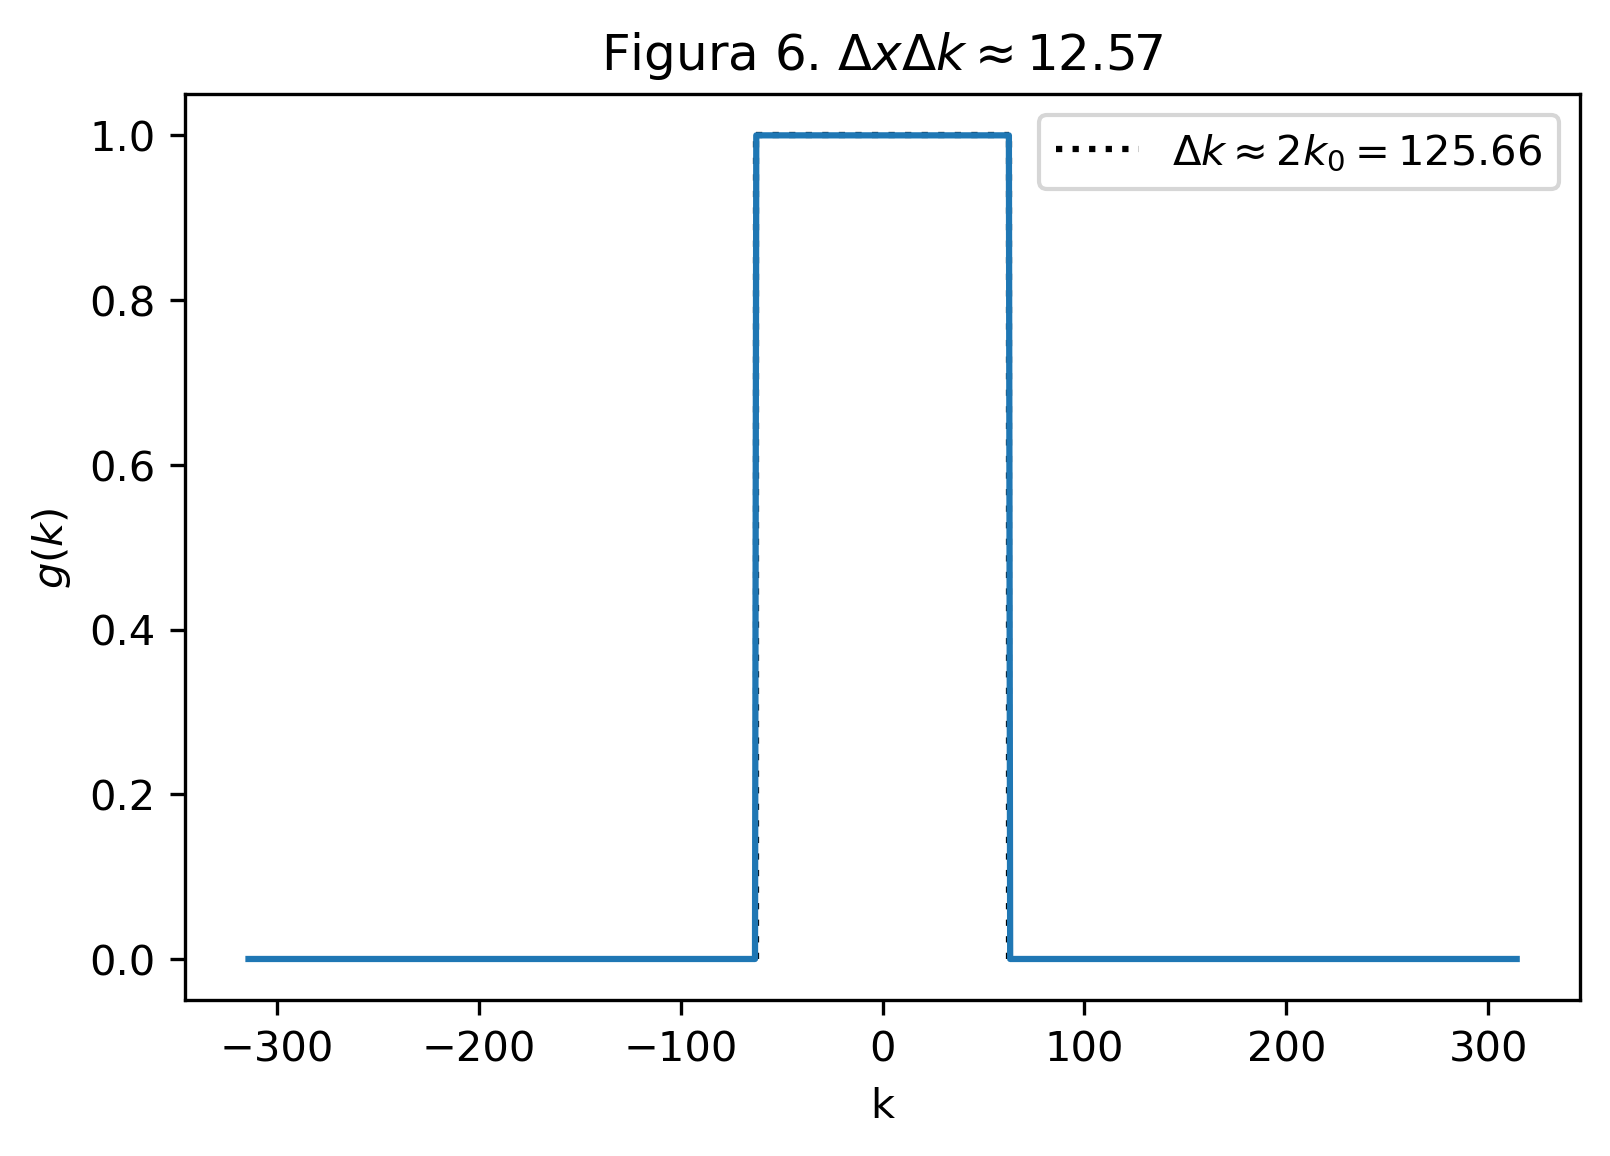

In [5]:
def g_func(σ, k_o, x, k):
    g = np.ones(len(k))
    g[np.abs(k) > k_o] = 0
    return g

fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    g_func,
    fig_num=fig_num)

### 4.3. Seno cardinal: $g(k) = \frac{sen(kD)}{kD}$, donde $2D$ es el ancho del paquete de onda.

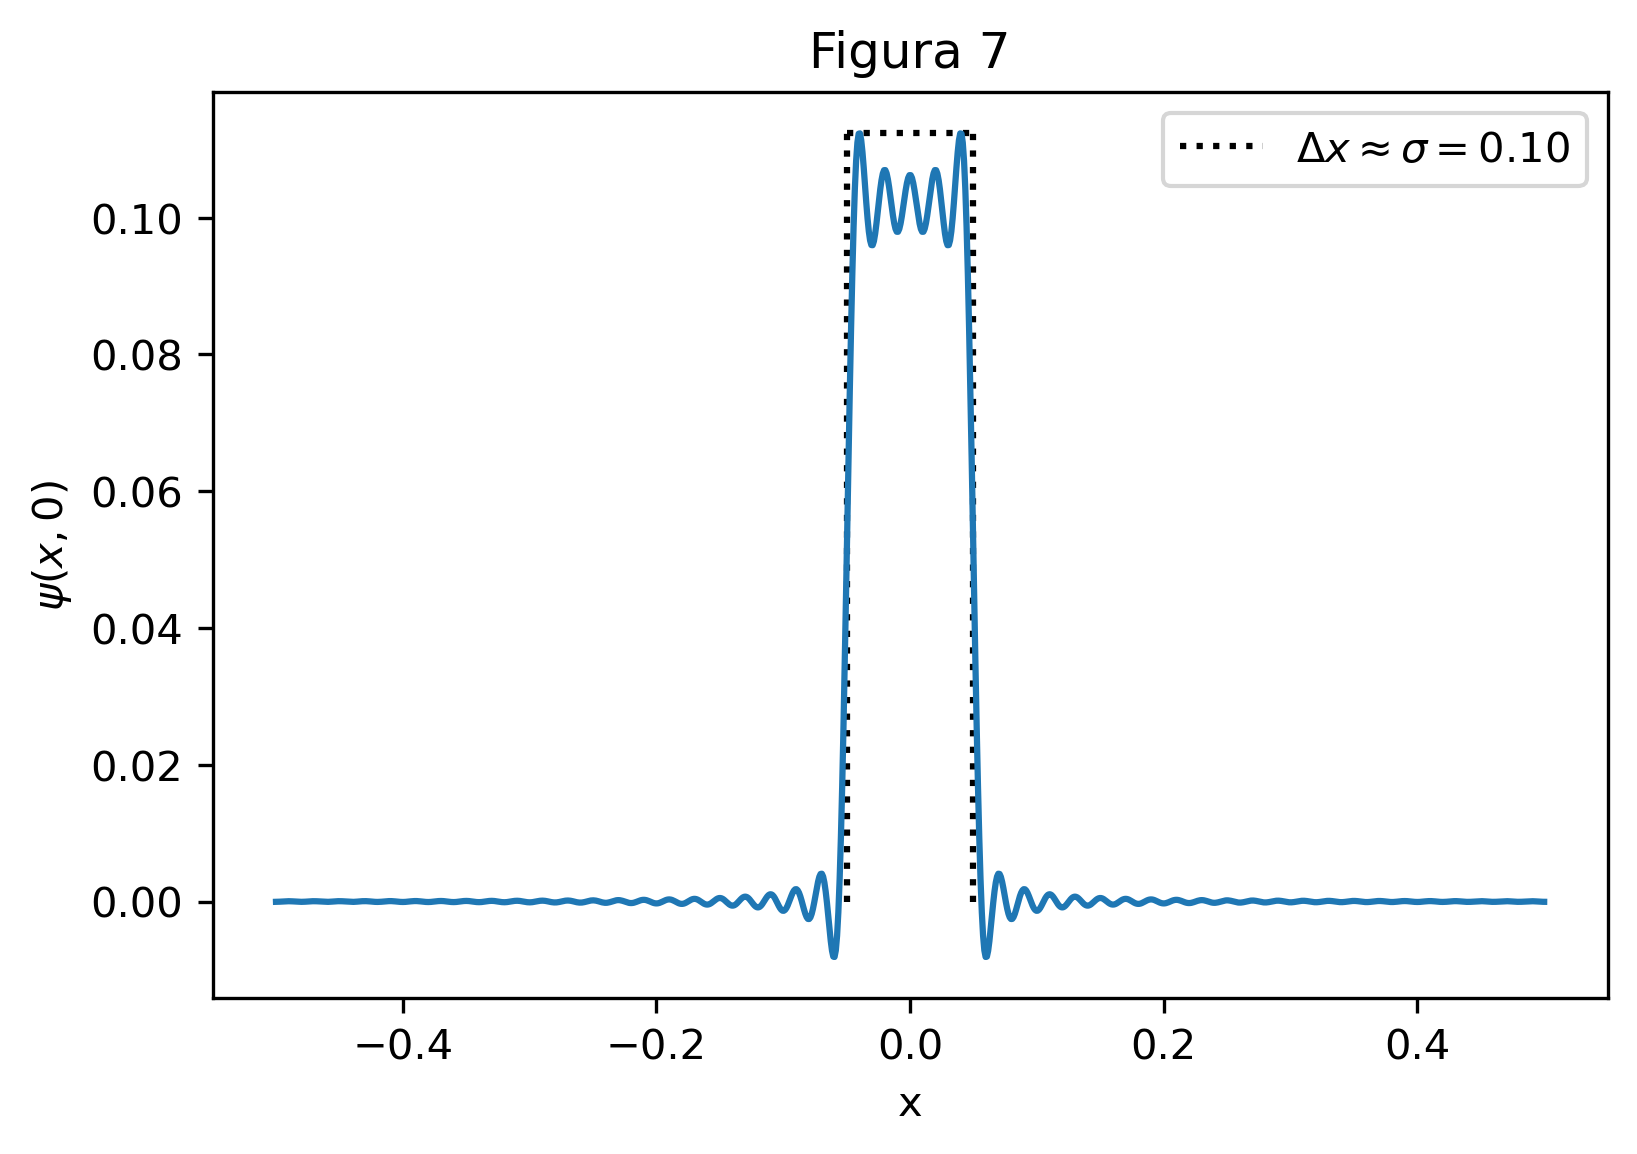

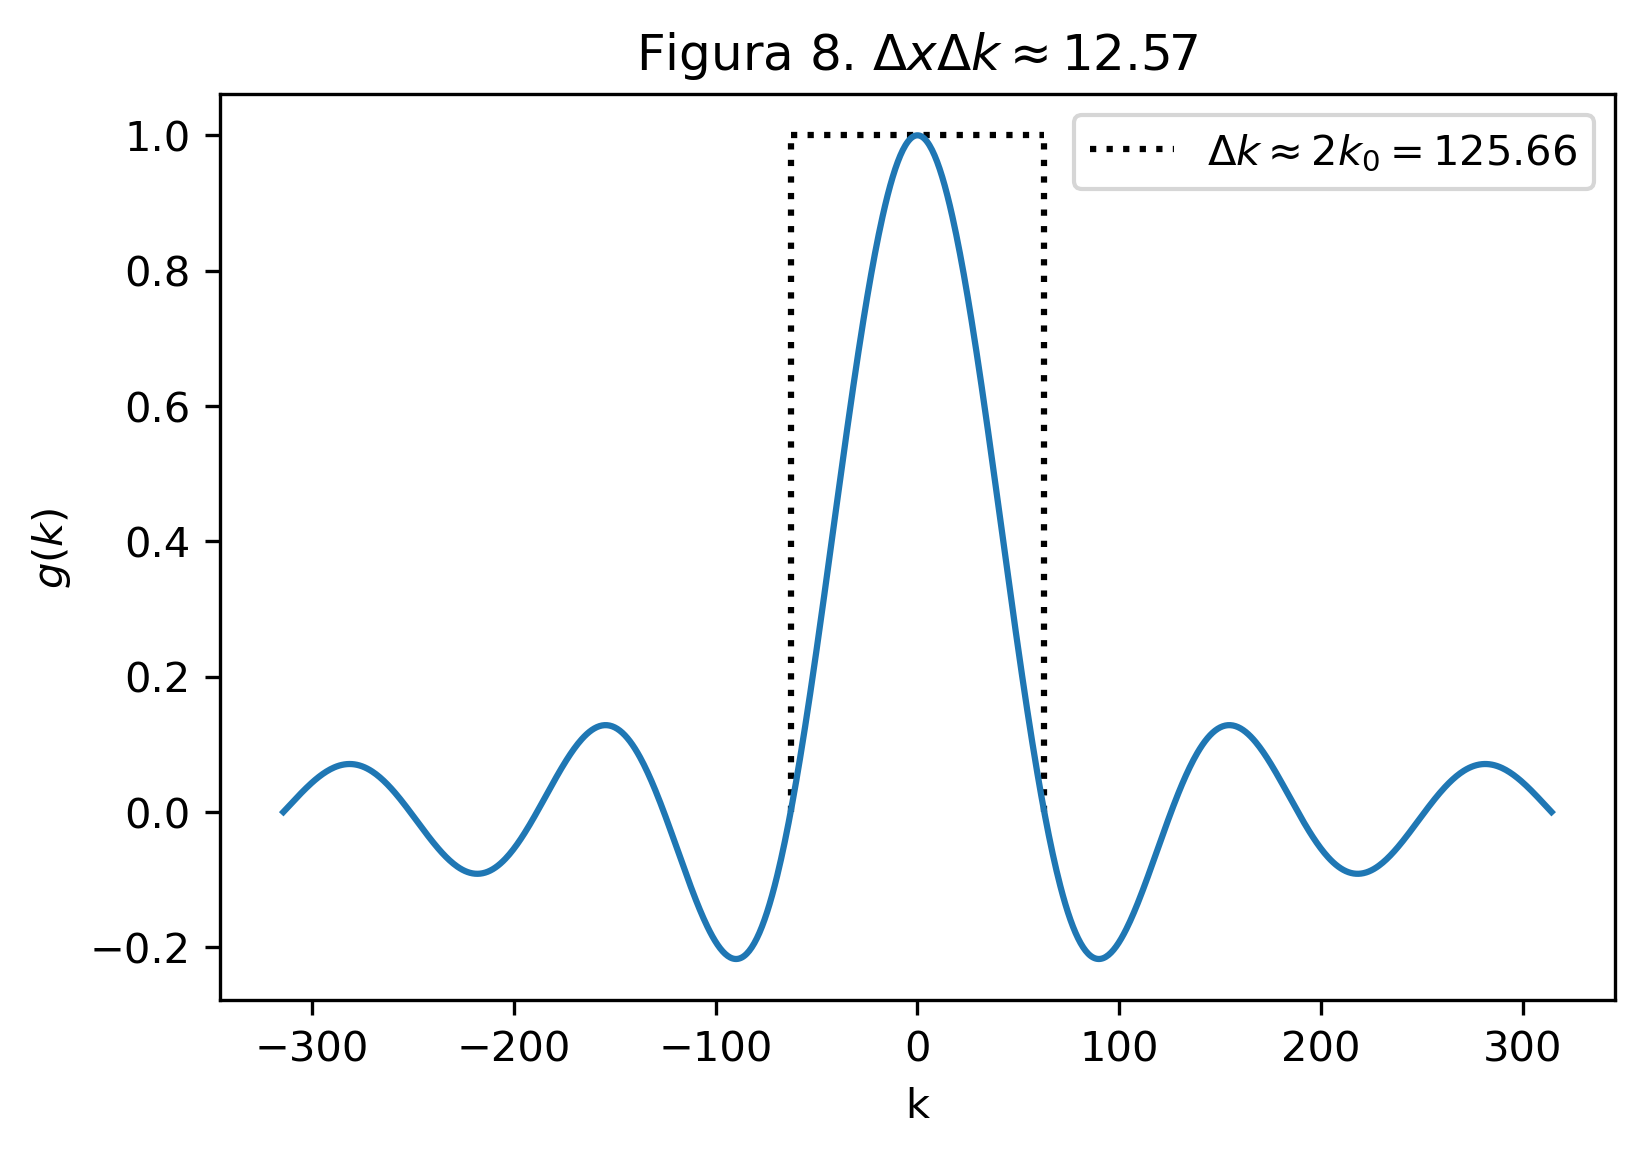

In [6]:
fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    lambda σ, k_o, x, k : np.sin(k*σ/2) / (k*σ/2),
    fig_num=fig_num)

### 4.4. Gauciana: $g(k) = \frac{1}{\sqrt{\pi}} e^{-k^2/k_o^2}$

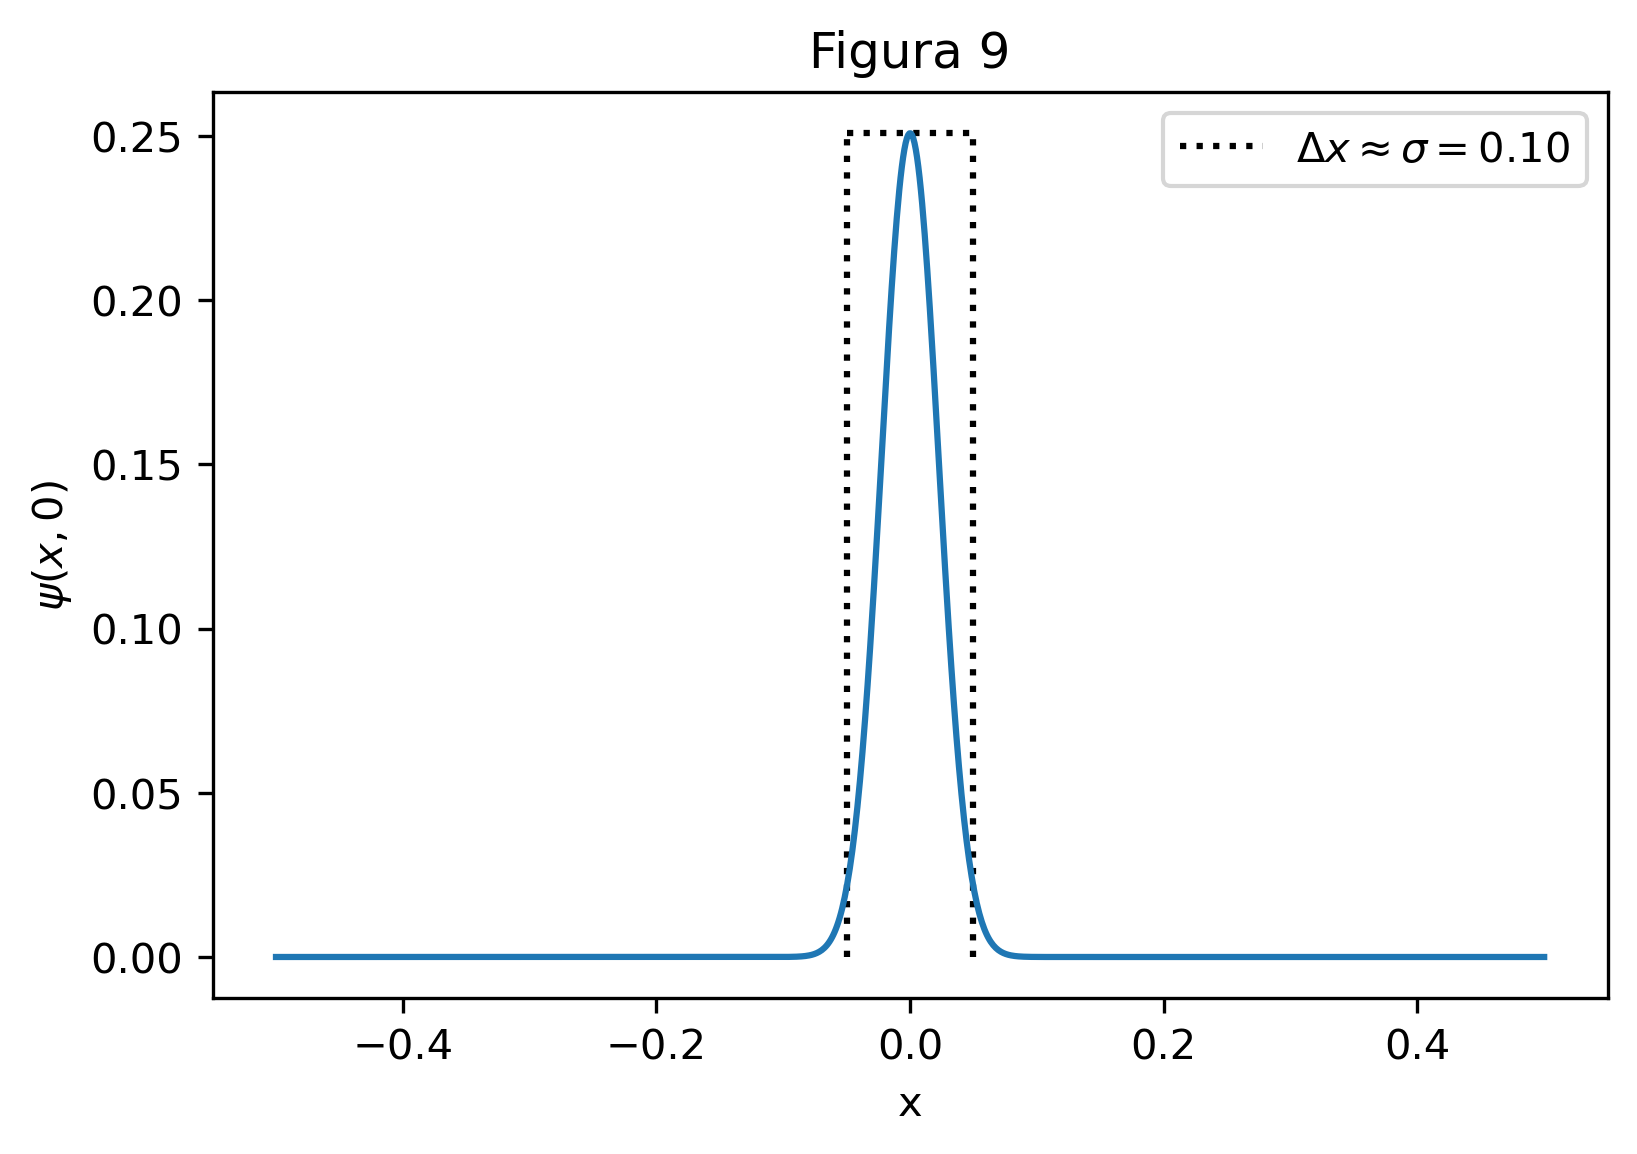

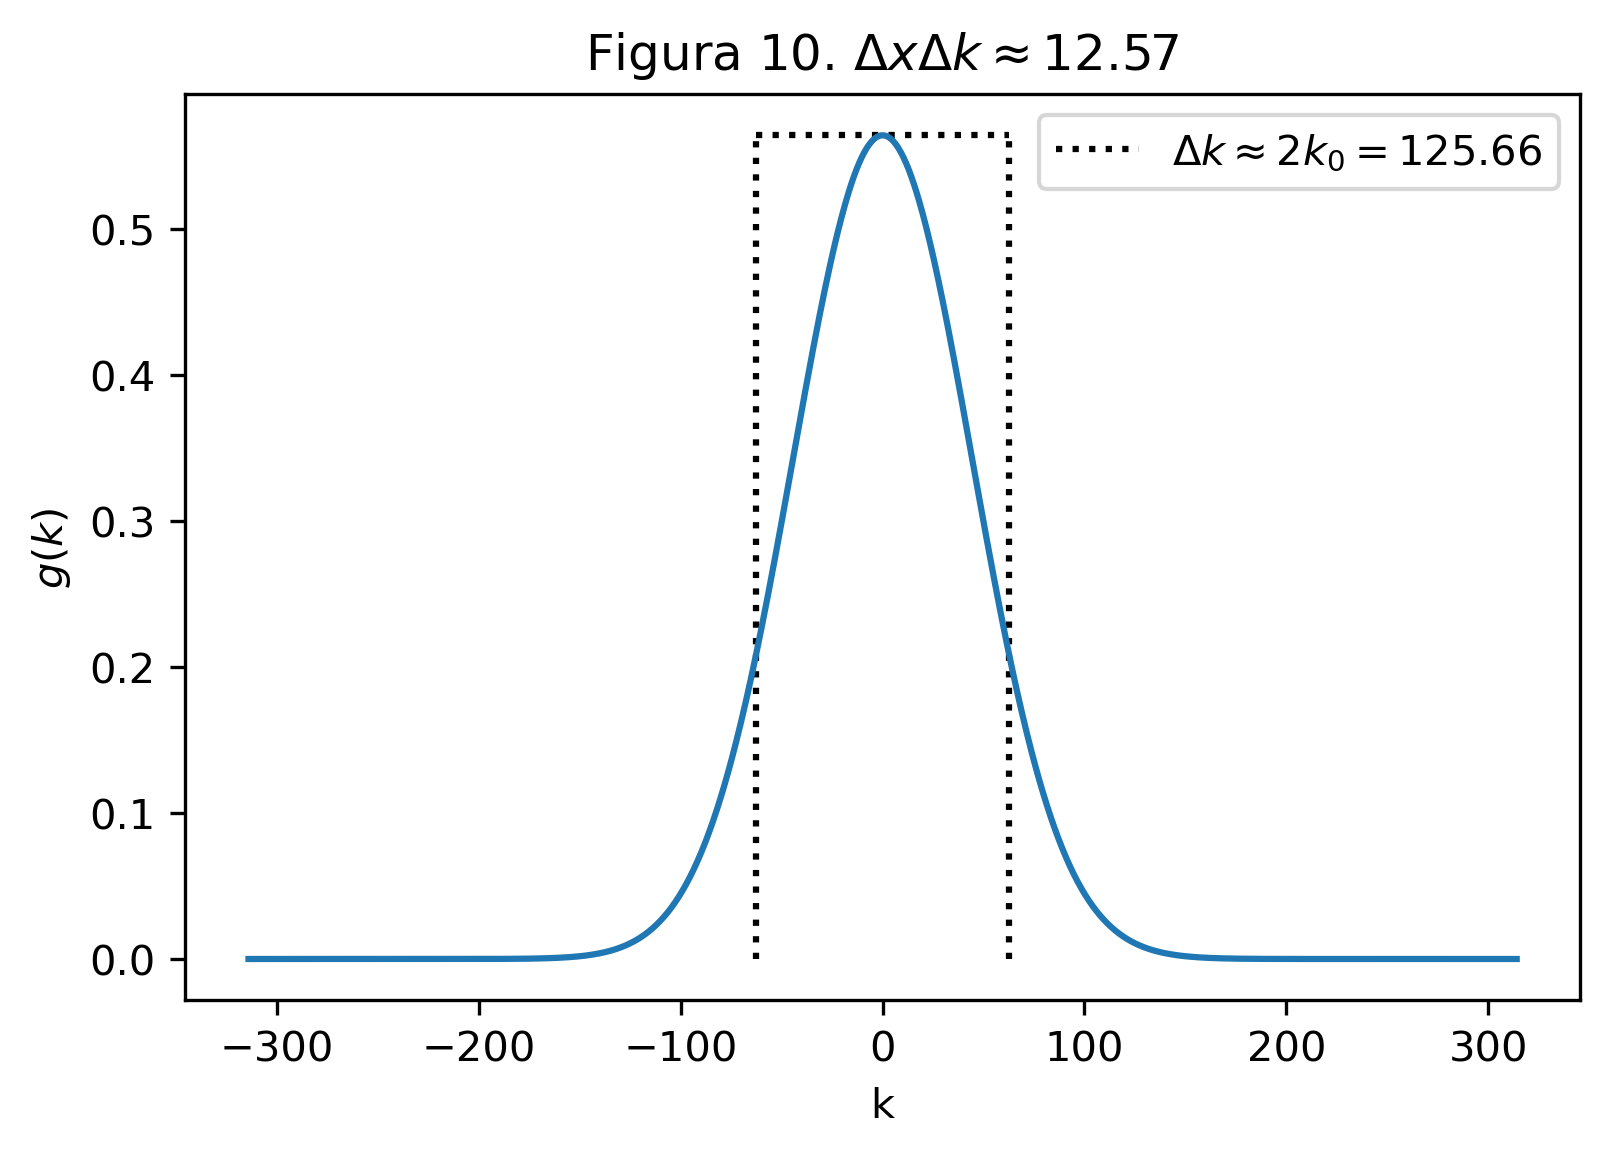

In [7]:
fig_num = plot_wave_packet(
    0.1, 
    2*np.pi / 0.1, 
    lambda σ, k_o, x, k : np.exp(-(k/k_o)**2) / np.sqrt(np.pi),
    fig_num=fig_num)

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas
5.1.1. Con sus propias palabras, describa cómo se obtienen las ecuaciones (1) y (2).

5.1.2. En el método **plot_wave_packet**, implementado en el ítem 3, ¿cuál es el propósito de utilizar el método *np.trapz*?

5.1.3. En el método **plot_wave_packet**, implementado en el ítem 3, ¿cómo se relaciona la variable **psi** con la ecuación (1)? Argumente su respuesta.

5.1.4. Describa cómo se obtiene la representación de una onda (señal) periódica en términos de una serie de Fourier.

5.1.5. ¿Cómo se relacionan las Figuras 1 a 4 con la representación de una onda cuadrada? Argumente su respuesta.


### 5.2. Segundo bloque de preguntas

5.2.1. En términos matemáticos formales, defina la incertidumbre para medir la posición $x$ y el número de onda $k$. Tenga en cuenta la definición de varianza y desviación estándard.

5.2.2. En las Figuras 5 a 10, ¿cómo se relaciona la incertidumbre de medir la posición ($\Delta x$) del paquete de onda y su contenido especctral ($\Delta k$)?

5.2.3. Demuestre, con argumentos matemáticos, que, para los casos graficados en las figuras 5 a 10, $\Delta x \Delta k = 4\pi$.

5.2.4. A partir del análisis de un paquete de onda propuesto en el primer capítulo de Cohen-Tannoudji et. al. (2020), deduzca la expresión $\Delta x \Delta p \geq \hbar$, donde $p$ es el momentum; $\hbar = h/2\pi$ y $h$, la constante de Planck.

5.2.5. Describa, analíticamente, cómo evoluciona en el tiempo un paquete de onda.

### 5.3. Tercer bloque de preguntas

5.3.1. A partir de la respuesta al ítem 5.2.5, construya un *Python Script* que permita visualizar (video) la evolución temporal de un paquete de onda en el tiempo, para ello, use un paquete de onda no gaussiano. Puede usar [ChatGPT](https://chat.openai.com/) como apoyo tecnológico para construir el *Python Script*. 

5.3.2. Las Figuras 9 y 10 corresponden con un paquete de onda gaussiano; demuestre analíticamente que el ancho de un paquete de onda gaussiano aumenta con el tiempo. 

5.3.3. Con el *Python Script* del ítem 5.3.1., muestre el aumento del ancho de un paquete de onda gaussiano a medida que este se propaga en el tiempo. 

5.3.4. Al analizar la propagación de un paquete de onda gaussiano en el tiempo, existe un tiempo $t_0$ (por ejemplo, t=0) en el cual el paquete tiene su menor ancho, sin embargo, en tiempos anteriores y posteriores a $t_0$ el ancho aumento. Si $t_0=0$, ¿cómo interpreta que en tiempos menores a $t_0$ (pasado) se observe un comportamiento similar al de tiempos mayores a $t_0$ (futuro)? Argumente su respuesta. 

5.3.5. Suponga que un paquete de onda que se propaga en una dimensión (1D) se encuentra con una barrera de potencial de la forma $U(x > a) = U_0$ y $U(x \leq a) = 0$, donde $U_0$ es una constante que corresponde a la altura de la barrera de potencial (en forma de escalón), la cual es lo suficientemente alta para afectar la propagación del paquete de onda, pero no tanto como para impedir que esta supere la barrera. Describa analíticamente y construya un *Python Script* que permita visualizar (video) la evolución temporal de dicho paquete de onda.

End!